In [1]:
from plotnine import ggplot, aes, geom_point,facet_wrap,labs,theme
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from ydata_profiling import ProfileReport


data = pd.read_csv('dataset_heart.csv')



data.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [2]:
profile = ProfileReport(data,minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

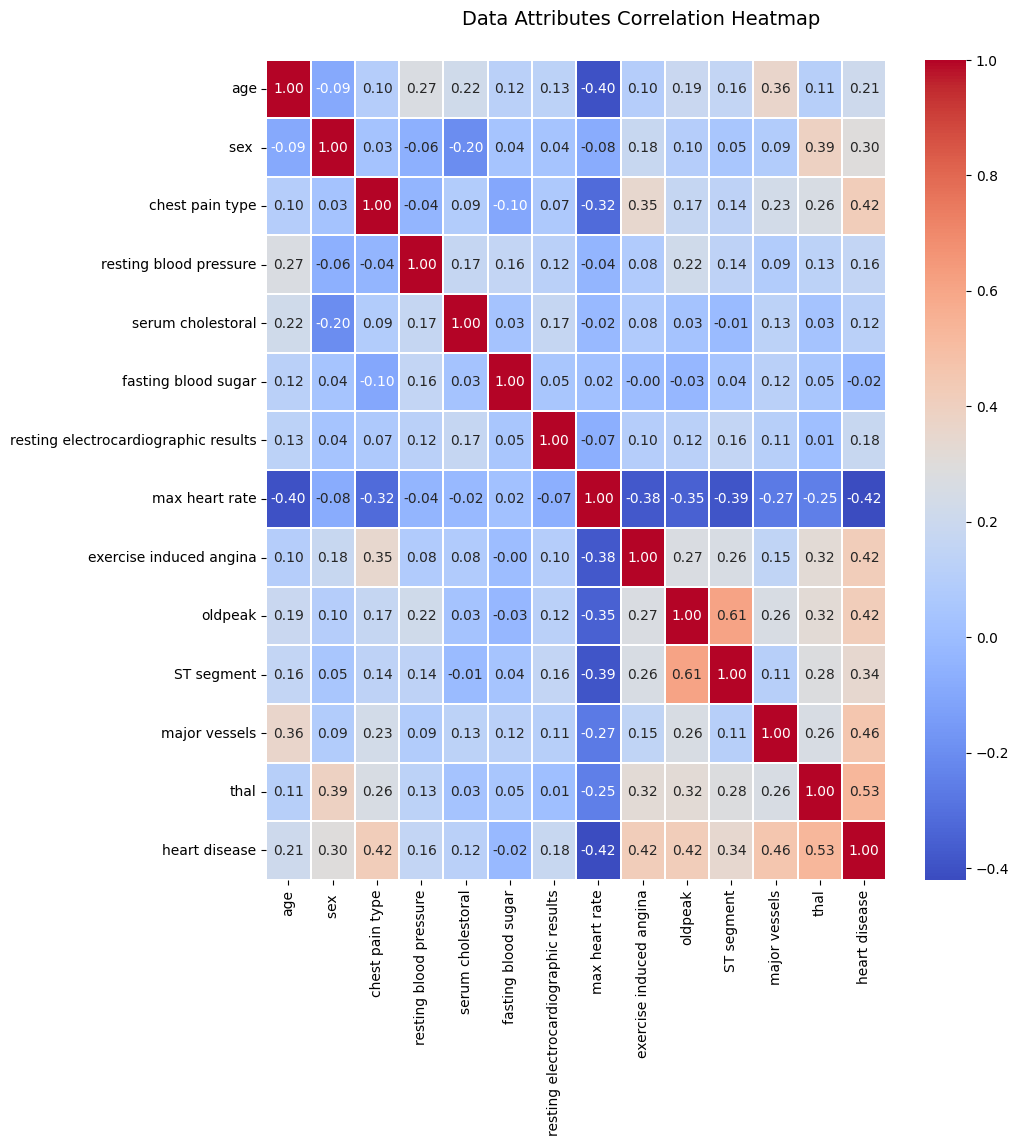

In [3]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 10))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Data Attributes Correlation Heatmap', fontsize=14)

In [4]:
data['electro results'] = data['resting electrocardiographic results'].replace(1,0)
data['sex'] = data.iloc[:,1]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

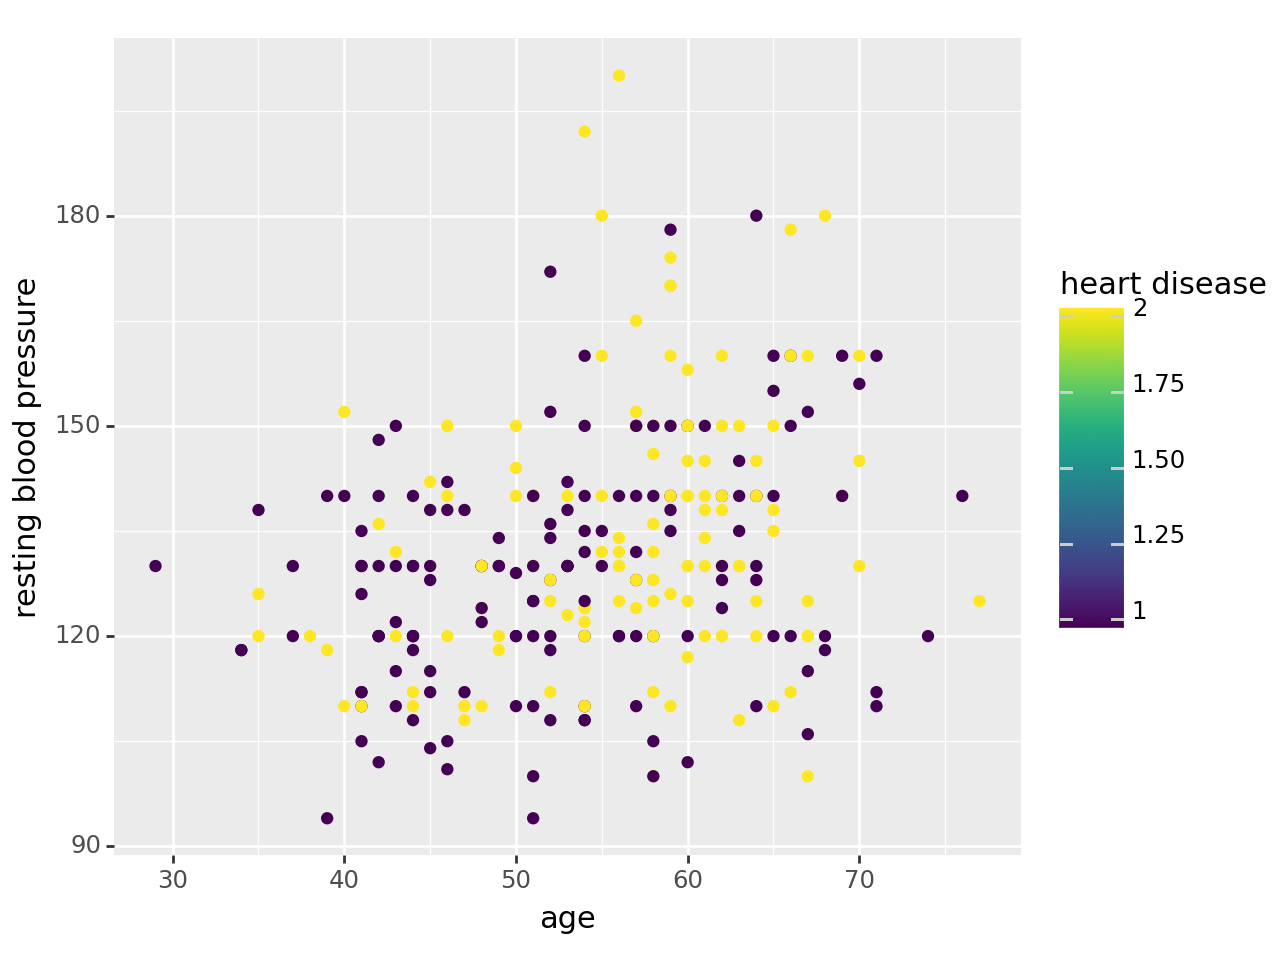

<Figure Size: (640 x 480)>

In [5]:
(
    ggplot(data)
    + aes(x="age", y="resting blood pressure")
    + geom_point(aes(color='heart disease'))                                                                        
)

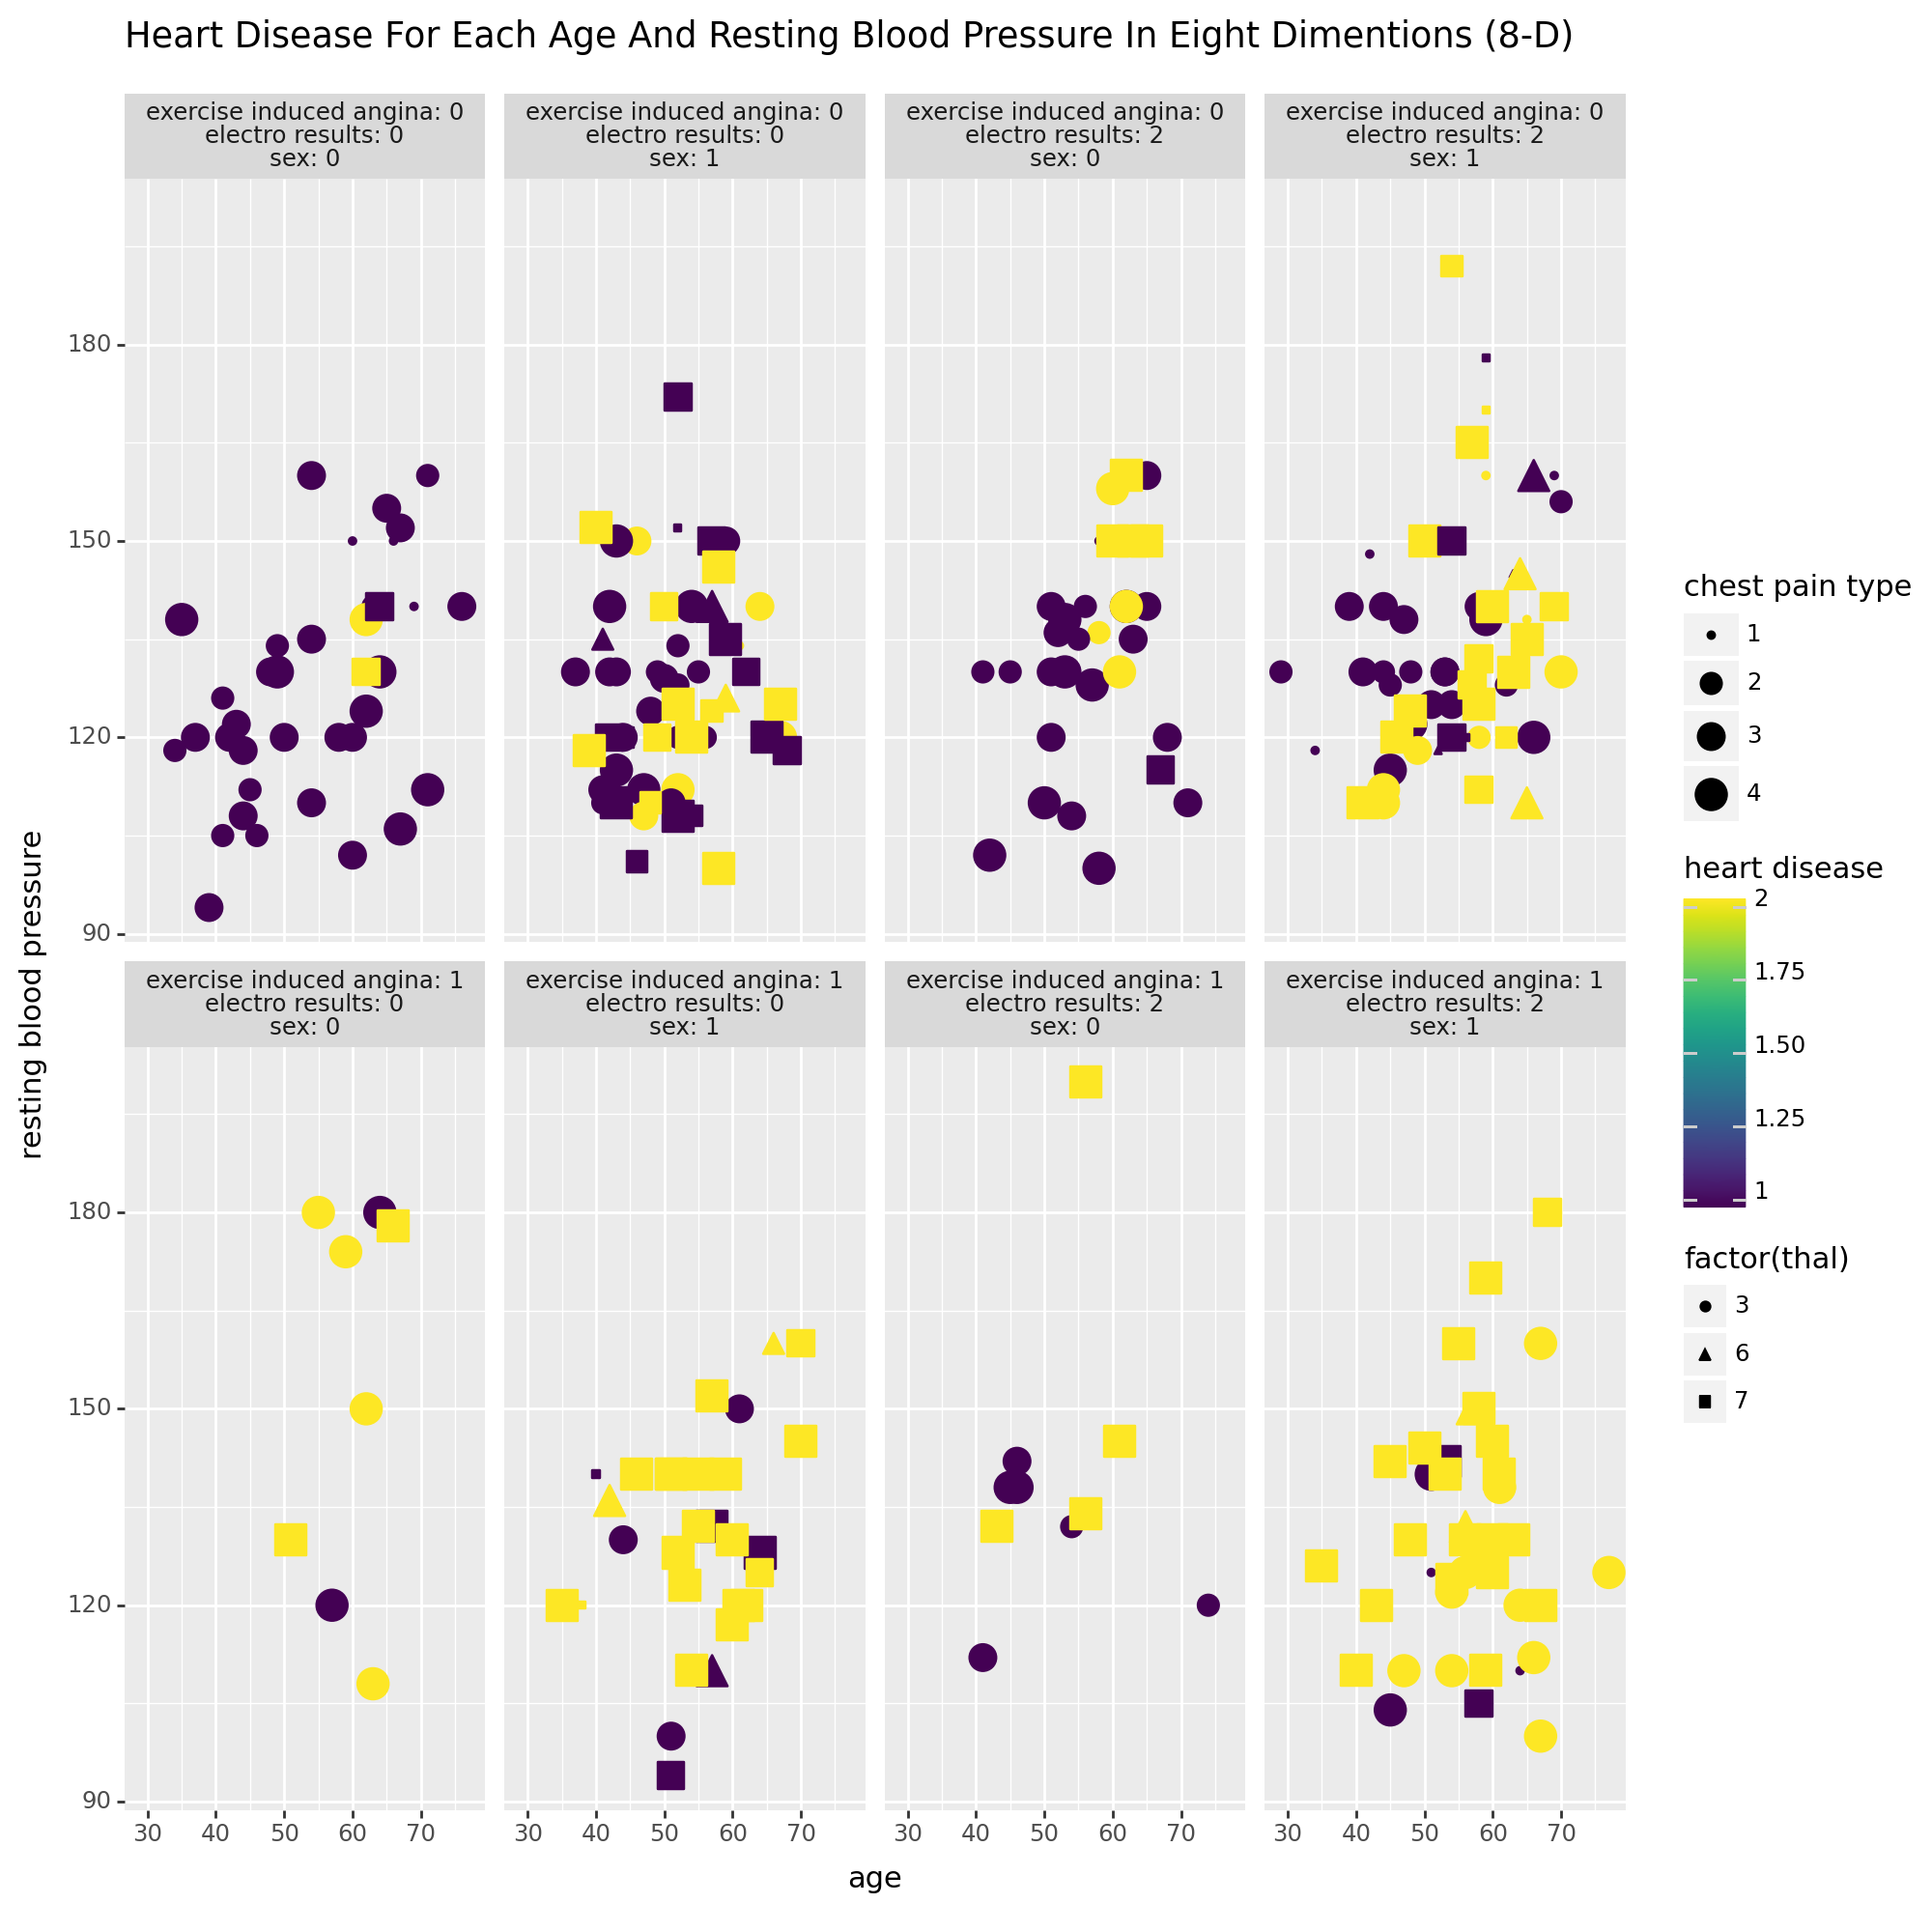

<Figure Size: (1000 x 1000)>

In [7]:
(
    ggplot(data)
    + facet_wrap(['exercise induced angina','electro results','sex'],nrow=2,labeller='label_both')
    + aes(x="age", y="resting blood pressure")
    + labs(
        x="age",
        y="resting blood pressure",
        title="Heart Disease For Each Age And Resting Blood Pressure In Eight Dimentions (8-D)",
    )
    + geom_point(aes(size='chest pain type',color='heart disease',shape='factor(thal)')) 
    + theme(figure_size=(10,10)) 
)